**Image Processing in OpenCV**

**by Văn Trường**
- Them duong dan cho thu vien
- import duong dan du lieu anh vao
- .....

In [1]:
import os, sys
# them duong dan vao thu muc 'data_image'
lib_path = os.path.abspath(os.path.join('data_image'))
sys.path.append(lib_path)

# them duong dan vao thu muc 'data_image_cmt'
lib_path = os.path.abspath(os.path.join('data_image_cmt'))
sys.path.append(lib_path)
#sys.path.remove(lib_path)
#print(sys.path)

In [2]:
#data_image_edit thư mục chứa ảnh sau khi edit
lib_path = os.path.abspath(os.path.join('data_image_edit'))
sys.path.append(lib_path)

**import thu vien cv2 vao**

In [3]:
import cv2
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt

**Open Image tu file data_image**
- Using cv2.imread('đường dẫn tới ảnh',1 là màu or 0 là đen trắng)
- test thử 5 ảnh
- True: là để ảnh màu, False là ảnh đen trắng 
- waitKey(0) là hàm đợi ,, trễ 0s

In [3]:
for i in range(1,6):
    img = cv2.imread('data_image_cmt\\%s.jpg' %i,True)
    cv2.imshow('image_%s' %i,img) # hien thi
    cv2.waitKey(0)

**Save Image vào thư mục sau khi đã Edit**
- thêm thư mục cần lưu vào đường dẫn 

- using cv2.imwrite('New Name', truyền đối tượng cần save vào)

In [5]:
img = cv2.imread('data_image\\%s.jpg' %'1',0)
cv2.imwrite('data_image_edit\\%s_edit.jpg' %'1',img)

True

**-------------------------------------------------**
**Changing Colorspaces**
- mục tiêu :
    - chuyển hình màu sang 1 màu khác, kiểu BGR <=> Gray, BGR <=> HSV...
    - using functions : cv2.cvtColor(), cv2.inRange() ...
- Changing Color-space

In [6]:
# các màu trong opencv
#lists_color = [i for i in dir(cv2) if i.startswith('COLOR_')]
#print(lists_color)

In [7]:
# lấy ảnh từ thư mục
img = cv2.imread('data_image\\%s.jpg' %'image_test',1)

#  Ảnh gốc
cv2.imshow('image',img)  # hiển thị
cv2.waitKey(0)           # đợi tắt ảnh

# ảnh edit
#cv2.cvtColor(input_image, type_of_conversion)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('image',img)  # hiển thị
cv2.waitKey(0) 



-1

- Object Tracking
    - Function inRange(src, lowerb, upperb[, dst]) -> dst 
        - => trả về 1 mảng nằm giữa 2 mảng nào đó 
        - src:  first input array
        - lowerb:  inclusive lower boundary array or a scalar
        - upperb:  inclusive upper boundary array or a scalar
        - dst:  output array of the same size as src and CV_8U type

In [9]:
# Convert BGR to HSV
# lấy ảnh từ thư mục
frame = cv2.imread('data_image\\%s.jpg' %'test_color_1',1)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#print(hsv)
# define range of blue color in HSV
lower_blue = np.array([110,50,50])   #???[110,50,50] lấy ở đâu ra ?
upper_blue = np.array([130,255,255]) #??? [130,255,255] <= [120 +- 10 , .., ..]

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

# hien thi
cv2.imshow('frame',frame)
cv2.imshow('hsv',hsv)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
cv2.waitKey(0)

-1

- How to find HSV values to track?
    - BGR => HSV
    - [Blue, Green, Red] => [Hue: màu sắc, Saturation: độ đậm, Value: độ sáng]

In [10]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print('green',hsv_green)

blue = np.uint8([[[255,0,0]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print('blue ',hsv_blue)

red = np.uint8([[[0,0,255]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
print('red  ',hsv_red)

# lay anh ra
frame = cv2.imread('data_image\\%s.jpg' %'test_color_1',1)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_green = np.array([50 ,255, 255])
upper_green = np.array([70, 255, 255])

mask = cv2.inRange(hsv,lower_green,upper_green)

res = cv2.bitwise_and(frame,frame, mask= mask)

# hien thi
cv2.imshow('frame',frame)
cv2.imshow('hsv',hsv)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
cv2.waitKey(0)

green [[[ 60 255 255]]]
blue  [[[120 255 255]]]
red   [[[  0 255 255]]]


-1

**--------------------------------------------------------------------------**
**Image Thresholding**
- muc tiêu: 
    - learn Simple thresholding, Adaptive thresholding, Otsu’s thresholding 
    - using function cv2.threshold, cv2.adaptiveThreshold
- Simple Thresholding
    - cv2.THRESH_BINARY     : Black => Threshold => White
    - cv2.THRESH_BINARY_INV : White => Threshold => Black
    - cv2.THRESH_TRUNC      : Black --> White => Threshold => Black
    - cv2.THRESH_TOZERO
    - cv2.THRESH_TOZERO_INV

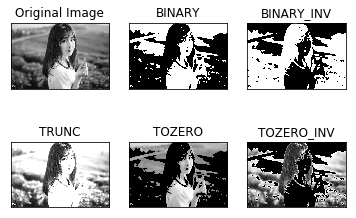

In [12]:
# lay anh 
img = cv2.imread('data_image\\%s.jpg' %'image_test',0)

# cv2.threshold(source image, threshold value, maxVal , threshold type)
# image thresholding , 127 la gia tri nguong cua mau/1 pixel, lon hon 255 thi lay 255 
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
    #cv2.imshow(titles[i],images[i])
    #cv2.waitKey(0)
    
    #save vao thu muc data_image_edit
    #cv2.imwrite('data_image_edit\\%s.jpg' %titles[i],images[i]) 
plt.show()

In [13]:
# with THRESH_BINARY type :  Black => threshold => White 
for i in range(1,255,20):
    ret,thresh = cv2.threshold(img,i,255,cv2.THRESH_BINARY)
    cv2.imwrite('data_image_edit\\threshold_%s.jpg' %i,thresh)

- Adaptive Thresholding ( thresh old )
- using adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C) -> dst
- blockSize là kích thước vùng lân cận
- C : là threshold = threshold - C
- vd th2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
- =>  trả về kiểu ảnh có ngưỡng tùy theo từng vùng
    - cv2.ADAPTIVE_THRESH_MEAN_C : ngưỡng là giá trị trung binh vùng lân cận .
        - với THRESH_BINARY thì nếu lớn hơn ngưỡng thì => black , không lớn hơn thì => white
    - cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

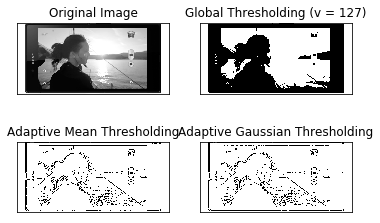

-1

In [14]:
img = cv2.imread('data_image\\test_adaptiveThreshold.jpg',0)
img = cv2.medianBlur(img,5) # la mờ image bộ lọc trung bình : 1,3,5,7,....

# ret chính là giá trị ngưỡng: ret = 127 : print(ret) 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# ret,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #có thể dùng thay cho chọn ngẫu nhiên là 127

# adaptive Thresh old
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,3)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)

# phần hiển thị
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    #cv2.imwrite('data_image_edit\\Th_ %s.jpg' %titles[i],images[i])
plt.show()

cv2.imshow('Adaptive Mean Thresholding',th2)
cv2.imshow('Adaptive Gaussian Thresholding',th3)
cv2.waitKey(0)

- Otsu’s Binarization 
    - cv2.THRESH_OTSU
    - cú pháp tương tự: ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    - thay vì chọn ngưỡng thì cv2.THRESH_OTSU làm tốt hơn

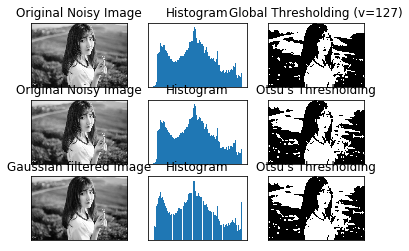

In [15]:
img = cv2.imread('data_image\\image_test.jpg',0)

# global thresholding
# ret1 = 127
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
# ret2 = ngưỡng mà Otsu’s tính ra: để kiểm tra dùng print(ret2)
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    
    cv2.imshow('%s' %titles[i*3+2],images[i*3+2])
    cv2.waitKey(0)
plt.show()
print('ret1 = ',ret1,';ret2 = ',ret2,';ret3 = ',ret3)

**------------------------------------------------------------------------------**
**Geometric Transformations of Images**
- Mục tiêu: 
    - học các phép biến đổi hình học của ảnh : translation(dịch), rotation(xoay), affine transformation(biến đổi qua ánh xạ ) ..
- Transformations:    
    - Scaling:
        - cv2.resize() with cv2.INTER_AREA , cv2.INTER_CUBIC, cv2.INTER_LINEAR, cv2.INTER_LINEAR
    - Translation : 
        - cv2.warpAffine() :      lấy matran 2x3 làm đầu vào
        - cv2.warpPerspective():  lấy ma trận 3x3 làm đầu vào
    - Rotation: 
        - cv2.getRotationMatrix2D()
    - Affine Transformation:
        - cv2.getAffineTransform()
    - Perspective Transformation:
        - cv2.getPerspectiveTransform
        - cv2.warpPerspective
    

- Scaling : thay đổi lại kích thước ảnh
    - res = cv2.resize(src = img,dsize = None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    - res = cv2.resize(src = img,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    - res = cv2.resize(src = img,(width,height), interpolation = cv2.INTER_CUBIC)
    - (fx , fy) là tỉ lệ thay đổi so vs (width,height)
        - cv2.INTER_AREA 
        - cv2.INTER_CUBIC
        - cv2.INTER_LINEA
        - cv2.INTER_LINEAR

In [16]:
img = cv2.imread('data_image\\image_test.jpg')

res = cv2.resize(img,None,fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)
# or 
height, width = img.shape[:2] # = 1000,1200
fx, fy = 2,2 # ti le
res1 = cv2.resize(img,(fx*width, fy*height), interpolation = cv2.INTER_CUBIC)
#
cv2.imshow('Original',img)
cv2.imshow('Resize',res)
cv2.imshow('Resize1',res1)
cv2.waitKey(0)


ret1 =  127.0 ;ret2 =  118.0 ;ret3 =  118.0


-1

- Tranlasion
    - res = cv2.warpAffine(img,M,(width,height))
    - M laf ma tran 2x3 [[1,0,tx],[0,1,ty]]

In [17]:
img = cv2.imread('data_image\\image_test.jpg',0)

rows,cols = img.shape # (height,width)
tx,ty = 300,100

M = np.float32([[1,0,tx],[0,1,-ty]]) #[hệ số dịch cols, hệ số dịch rows, dịch tx] => [1*tx,0*tx]; tt vs ty
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)

-1

- Rotation
    - res = cv2.getRotationMatrix2D(center, angle, scale) : To find this transformation matrix
        - center là tâm quay : thường là (height/2, width/2)
        - angle : góc quay
        - scale : tỉ lệ hình

In [18]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1/2)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)

-1

 - Affine Transformation
     - cv2.getAffineTransform
     - các đường // thì vẫn //

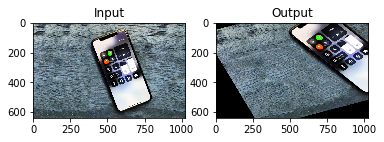

In [19]:
img = cv2.imread('data_image\\test_perspective.jpg',1)
rows,cols,ch= img.shape


pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

#subplot(nrows, ncols, index, **kwargs)
plt.subplot(121),plt.imshow(img),plt.title('Input') #121 <=> 1 row , 2 col, index = 1
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

- Perspective Transformation
    - xác định được 4 điểm có 3 điểm không thẳng hàng vs nhau để lấy ra ảnh cần quan tâm
    - cv2.getPerspectiveTransform sẽ trả về ma trận 3x3 

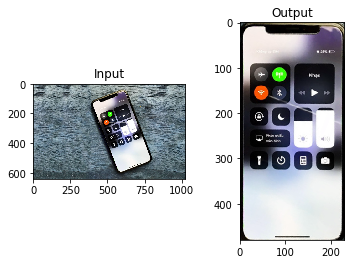

In [20]:
# su dung img o tren
pts1 = np.float32([[385,120],[615,30],[570,600],[800,510]]) #4 điểm cần tìm (col,row)
pts2 = np.float32([[0,0],[230,0],[0,480],[230,480]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(230,480))
cv2.imwrite('data_image_edit\\%s_edit.jpg' %'test_perspective',dst)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

**--------------------------------------------------------------**

**Smoothing Images**
- Mục tiêu: learn
    - làm mờ hình ảnh bằng nhiều bộ lọc thông thấp khác nhau
    - bộ lọc tùy chỉnh (2D)
- 2D Convolution ( Image Filtering )
- Image Blurring (Image Smoothing)
    - 1.Averaging
    - 2.Gaussian Filtering 
    - 3.Median Filtering
    - 4.Bilateral Filtering         

- 2D Convolution (image filtering)
    - using function : cv2.filter2D(img,-1,kernel)

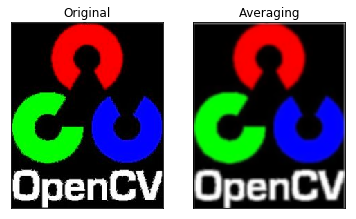

In [62]:
img = cv2.imread('data_image\\test_smoothing.png')

kernel = np.ones((5,5),np.float32)/25 # create ma tran đơn vị kiểu float 5x5
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

- 1.Averaging
- using functions: cv2.blur() or cv2.boxFilter()
- lấy giá trị trung bình của tất cả pixels dưới kernel area 
  và thay thế phần tử trung tâm bằng giá trị trung bình đó

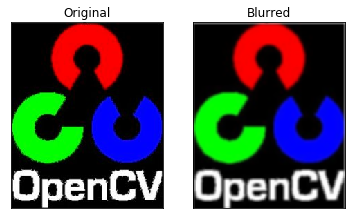

In [63]:
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

- 2.Gaussian Filtering
- using function: cv2.GaussianBlur()

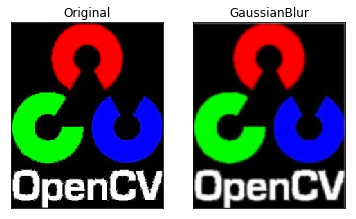

In [64]:
blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

- 3.Median Filtering
    - using cv2.medianBlur(img,t) vs  0< t < 10

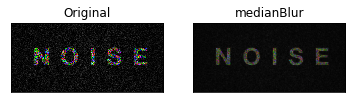

In [38]:
img = cv2.imread('data_image\\test_median_filtering.jpg')
median = cv2.medianBlur(img,7) # 7 <=> giảm 70% nhiễu

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('medianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

- 4.Bilateral Filtering
    - cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
    - d là đường kính mỗi pixel lân cận
    - không làm mờ cạnh .. khác với các cái trên

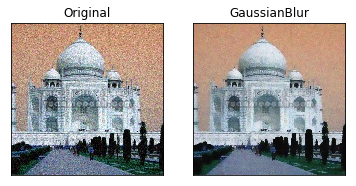

In [59]:
img = cv2.imread('data_image\\test_bilateral_filtering.jpg')
blur = cv2.bilateralFilter(img,10,80,100)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

**---------------------------------------------------------**

**Morphological Transformations**
- Mục tiêu:
    - learn different morphological operations like Erosion, Dilation, Opening, Closing etc.
    - using functions : cv2.erode(), cv2.dilate(), cv2.morphologyEx()
- 1. Erosion (xói mòn )
    - xói mòn ranh giới của đối tượng
    

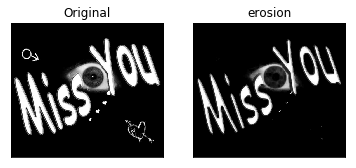

In [42]:
img = cv2.imread('data_image\\test_erosion.jpg',1)
kernel = np.ones((8,8),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.show()

- Dilation : đậm hơn, to ra

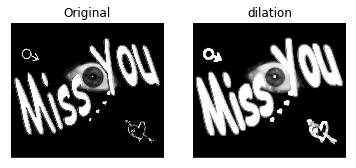

In [29]:
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.show()

- Opening giống như erosion sau do dilation
    - cv2.morphologyEx()
    - cv2.MORPH_OPEN

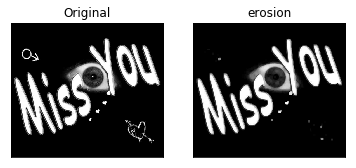

In [28]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening),plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

- Closing: sử dụng dilation sau đó erosion đi
    - cv2.morphologyEx()
    - cv2.MORPH_CLOSE

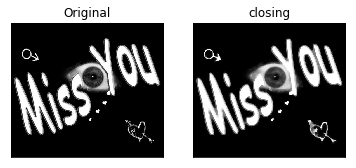

In [34]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

- Morphological Gradient
    - cv2.morphologyEx()
    - cv2.MORPH_GRADIENT

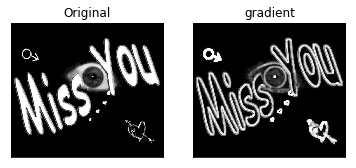

In [44]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient),plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

- Top Hat: 
    - cv2.morphologyEx()
    - cv2.MORPH_TOPHAT

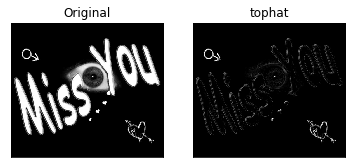

In [51]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat),plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

- Black Hat
    - cv2.morphologyEx()
    - cv2.MORPH_BLACKHAT

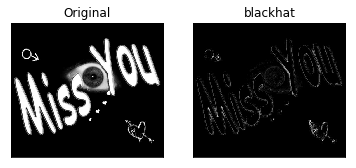

In [52]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blackhat),plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

- một số trường hợp không phải là kernel ma trận hcn nữa

In [57]:
# Rectangular Kernel
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [58]:
# Elliptical Kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [59]:
# Cross-shaped Kernel
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

**--------------------------------------------**

**Image Gradients**
- muc tiêu:
    - tìm Image gradients, edges etc
    - using functions : cv2.Sobel(), cv2.Scharr(), cv2.Laplacian() etc

- 1. Sobel and Scharr Derivatives
    - 

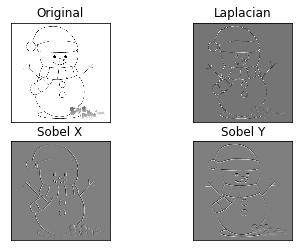

-1

In [4]:
img = cv2.imread('data_image\\test_.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F) # đổi ngược màu black <=> white
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imshow('laplacian', laplacian)
cv2.imshow('sobelx', sobelx)
cv2.imshow('sobely', sobely)
cv2.waitKey(0)

- using cv2.CV_8U với cv2.CV_64F

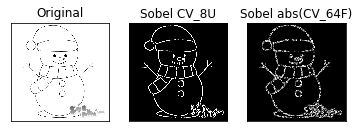

True

In [78]:
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite('data_image_edit\\Sobel CV_8U edit.jpg',sobel_8u)

**-----------------------------------------------------------------**

**Canny Edge Detection**
- phát hiện cạnh, gờ
    - 1.Noise Reduction
    - 2.Tìm cường độ Gradient của ảnh
    - 3.Loại bỏ Non-maximum
    - 4.ngưỡng Hysteresis
- mục tiêu:
    - using function: cv2.Canny(image, threshold1, threshold2)

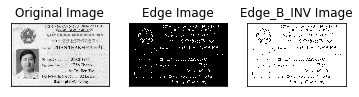

-1

In [42]:
img = cv2.imread('data_image_cmt\\5.jpg',0)
edges = cv2.Canny(img,200,250)
ret,th1 = cv2.threshold(edges,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ret,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ret,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#kernel = np.ones((2,2),np.uint8)
#closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
#dilation = cv2.dilate(edges,kernel,iterations = 1)
#erosion = cv2.erode(th1,kernel,iterations = 1)
#median = cv2.medianBlur(edges,1)#1,3,5,7....
#gradient = cv2.morphologyEx(th1, cv2.MORPH_GRADIENT, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')# (121: 1 row , 2 col, index = 1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(th1,cmap = 'gray')
plt.title('Edge_B_INV Image'), plt.xticks([]), plt.yticks([])


plt.show()
#cv2.imshow('edges',edges)
#cv2.imshow('th1',th1)
cv2.imshow('th2',th2)
cv2.imshow('th3',th3)
cv2.waitKey(0)

**----------------------------------------------------**

**Image Pyramids**
- mục tiêu:
    - Image Pyramids: 1. Gaussian Pyramid và 2. Laplacian Pyramids
    - use Image pyramids để tạo ra ảnh ghép mới
    - functions: cv2.pyrUp(), cv2.pyrDown()

    # import cv2
    #import numpy as np,sys

    A = cv2.imread('data_image\\apple.jpg')
    B = cv2.imread('data_image\\orange.jpg')

    # generate Gaussian pyramid for A
    G = A.copy()
    gpA = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpA.append(G)

    # generate Gaussian pyramid for B
    G = B.copy()
    gpB = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpB.append(G)

    # generate Laplacian Pyramid for A
    lpA = [gpA[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpA[i])
        L = cv2.subtract(gpA[i-1],GE)
        lpA.append(L)

    # generate Laplacian Pyramid for B
    lpB = [gpB[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpB[i])
        L = cv2.subtract(gpB[i-1],GE)
        lpB.append(L)

    # Now add left and right halves of images in each level
    LS = []
    for la,lb in zip(lpA,lpB):
        rows,cols,dpt = la.shape
        ls = np.hstack((la[:,0:cols/2], lb[:,cols/2:]))
        LS.append(ls)

    # now reconstruct
    ls_ = LS[0]
    for i in range(1,6):
        ls_ = cv2.pyrUp(ls_)
        ls_ = cv2.add(ls_, LS[i])

    # image with direct connecting each half
    real = np.hstack((A[:,:cols/2],B[:,cols/2:]))

    cv2.imshow('Pyramid_blending2.jpg',ls_)
    cv2.imshow('Direct_blending.jpg',real)

- Test 

    # erodes image based on given kernel size (erosion = expands black areas)
    def erode( img, kern_size = 3 ):
        retval, img = cv2.threshold(img, 254.0, 255.0, cv2.THRESH_BINARY) # threshold to deal with only black and white.
        kern = np.ones((kern_size,kern_size),np.uint8) # make a kernel for erosion based on given kernel size.
        eroded = cv2.erode(img, kern, 1) # erode your image to blobbify black areas
        y,x = eroded.shape # get shape of image to make a white boarder around image of 1px, to avoid problems with find contours.
        return cv2.rectangle(eroded, (0,0), (x,y), (255,255,255), 1)

    # finds contours of eroded image
    def prep( img, kern_size = 3 ):    
        img = erode( img, kern_size )
        retval, img = cv2.threshold(img, 200.0, 255.0, cv2.THRESH_BINARY_INV) #   invert colors for findContours
        return cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) # Find Contours of Image

    # given img & number of desired blobs, returns contours of blobs.
    def blobbify(img, num_of_labels, kern_size = 3, dilation_rate = 10):
        prep_img, contours, hierarchy = prep( img.copy(), kern_size ) # dilate img and check current contour count.
        while len(contours) > num_of_labels:
            kern_size += dilation_rate # add dilation_rate to kern_size to increase the blob. Remember kern_size must always be odd.
            previous = (prep_img, contours, hierarchy)
            processed_img, contours, hierarchy = prep( img.copy(), kern_size ) # dilate img and check current contour count, again.
        if len(contours) < num_of_labels:
            return (processed_img, contours, hierarchy)
        else:
            return previous

    # finds bounding boxes of all contours
    def bounding_box(contours):
        bBox = []
        for curve in contours:
            box = cv2.boundingRect(curve)
        bBox.append(box)
        return bBox

**---------------------------------------------------------**

**Contours in OpenCV**
- Getting Started Contours
- mục tiêu:
    - Learn to find contours, draw contours etc
    -  functions : cv2.findContours(), cv2.drawContours()
    - chú ý .. đối tượng phải là white và nền black,- -- sửa trực tiếp vào ảnh gốc

In [33]:
img = cv2.imread('data_image\\cmt.jpg') #0 - gray
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) # ngưỡng thích ứng ots'u


#cv2.findContours( first one is source image, second is contour retrieval mode, third is contour approximation method.)
image, contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)



- How to draw the contours?
    - cv2.drawContours(image, contours, contourIdx, color, size_draw) nếu contourIdx = -1 là vẽ tất cả contours    

In [34]:
imgdraw = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 1)
#cách khác
#img = cv2.drawContours(img.copy(), contours, 3, (0,255,0), 3)

#cnt = contours[4]
#img = cv2.drawContours(img.copy(), [cnt], 0, (0,255,0), 3)
cv2.imshow('img',img)
cv2.imshow('thresh',thresh)
cv2.imshow('imgdraw',imgdraw)
cv2.waitKey(0)

-1

In [22]:
cnt = contours[60]
imgdraw = cv2.drawContours(img.copy(), [cnt], 0, (0,255,0), 2)
cv2.imshow('img',img)
cv2.imshow('thresh',thresh)
cv2.imshow('imgdraw',imgdraw)
cv2.waitKey(0)

-1

- Contour Features
    - mục tiêu:
        - To find the different features of contours : area, perimeter, centroid, bounding box etc
        - functions related to contours.

- 1.Moments
    - calculate some features like center of mass of the object, area of the object etc
    - function: cv2.moments() 

In [6]:
M = cv2.moments(cnt)
#print(M)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
 
print(cx,cy)

405 627


- 2. Contour Area
    - cv2.contourArea()

In [24]:
area = cv2.contourArea(cnt)
print(area)  # M['m00']

3.0


- 3. Contour Perimeter
    - cv2.arcLength()

In [7]:
perimeter = cv2.arcLength(cnt,True)# True là chu vi đường khép kín
print(perimeter)

6.828427076339722


- 4. Contour Approximation
    - đường bao xấp xỉ

In [25]:
cnt  = contours[60]
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

imgdraw = cv2.drawContours(img.copy(), [approx], 0, (0,255,0), 2)
#cv2.imshow('img',img)
#cv2.imshow('thresh',thresh)
cv2.imshow('imgdraw',imgdraw)
cv2.waitKey(0)
 
#print(approx)

-1

- 5. Convex Hull : đường bao viền lồi ra
    - cv2.convexHull()

In [26]:
hull = cv2.convexHull(cnt)

imgdraw = cv2.drawContours(img.copy(), [hull], 0, (0,255,0), 2)
#cv2.imshow('img',img)
#cv2.imshow('thresh',thresh)
cv2.imshow('imgdraw',imgdraw)
cv2.waitKey(0)

-1

- 6. Checking Convexity : cv2.isContourConvex() # True or False về độ lồi lõm

In [27]:
k = cv2.isContourConvex(cnt)
print(k)

False


- 7. Bounding Rectangle: khung hcn
    - 7.a. Straight Bounding Rectangle:  cv2.boundingRect().

In [4]:
# giam bot hcn ko can thiet
#temp = [col,row,width,height]
def diminished_Rect(lists):
    N = len(lists)
    i = 0
    while i < N:
        j = 0
        while j < N:
            if i == j:
                j+=1
            elif lists[j][0] >= lists[i][0] and lists[j][1] >= lists[i][1] and lists[j][2] + lists[j][0] <= lists[i][2] + lists[i][0] and lists[j][1]+lists[j][3] <= lists[i][1]+ lists[i][3] :
                lists.remove(lists[j])
                N = len(lists)
                #j+=1
            else : j+=1   
        N = len(lists)
        i+=1
    return lists

In [5]:
#lits_crwh da dc giam bot
def M(list_crwh,delta_w,delta_h):
    n = len(list_crwh)
    i = 0
    while i< n:
        j = 0
        while j < n:
            i1,i2,i3 = False,False,False
            if list_crwh[i][0] <= list_crwh[j][0] <= list_crwh[i][0]+list_crwh[i][2] + delta_w:
                i1 = True
            if list_crwh[i][1]-delta_h <= list_crwh[j][1] <= list_crwh[i][1]+list_crwh[i][3]+ delta_h:
                i2 = True
            if list_crwh[i][1]-delta_h <= list_crwh[j][1] + list_crwh[j][3] <= list_crwh[i][1]+list_crwh[i][3]+ delta_h:
                i3 = True
            if i == j:
                j+=1
            elif  i1 and (i2 or i3):
                c = min(list_crwh[i][0],list_crwh[j][0])
                list_crwh[i][2] = max(list_crwh[i][0] + list_crwh[i][2],list_crwh[j][0]+ list_crwh[j][2])- c
                list_crwh[i][0] = c
                r = min(list_crwh[i][1],list_crwh[j][1])
                list_crwh[i][3] = max(list_crwh[i][1] + list_crwh[i][3],list_crwh[j][1]+ list_crwh[j][3]) - r
                list_crwh[i][1] = r
                list_crwh.remove(list_crwh[j])
            else: j+=1
            n = len(list_crwh)
        i+=1
    return list_crwh
    

In [6]:
def FindText(img_path):
    #img = cv2.imread('data_image\\cmt.jpg') #0 - gray
    img = cv2.imread(img_path) #0 - gray
    img1 = img.copy()


    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #edges = cv2.Canny(imgray,200,250)
    ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) # ngưỡng thích ứng ots'u


    #cv2.findContours( first one is source image, second is contour retrieval mode, third is contour approximation method.)
    image, contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    lists = []
    #(x, y)= (col,row) là tọa độ gốc, w là rộng tính từ xy sang bên phải, h là cao tính từ xy xuống dưới
    for cnt in contours :    
        temp = list(cv2.boundingRect(cnt)) #temp = [col,row,width,height]
        if temp[3] > 3:
            lists.append(temp)
            x,y,w,h = temp
            imgrectangle = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    # hcn cac duong vien tim dc
    ##cv2.imshow('contours tim duoc',imgrectangle)

    # tim truong text
    lenList = 0
    height,width,ch = img.shape # (height,width)
    delta_w = 0
    delta_h = 0
    while lenList != len(lists):
        lenList = len(lists)
        li_= M(lists,delta_w,delta_h)

    for temp in li_:
        x,y,w,h = temp
        imgrectangle1 = cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),1)

    ##cv2.imshow('Tim truong text',imgrectangle1)

    ##cv2.waitKey(0)
    return img, img1

In [12]:
def dirwalk(dir, bag, wildcards):
    """ bag là một list chứa các file thỏa mãn quy tắc wildcards """

    if glob.glob(path.join(dir, "*")):
        bag.extend(glob.glob(path.join(dir, wildcards)))
        dirwalk(path.join(dir, "*"), bag, wildcards)

In [18]:
from os import path
import os
import glob
files = []
Ext = 'jpg'
dirwalk('data_image_cmt',files,u"*" + Ext)
#print(files)

In [52]:
for imgName in files:
    img,img1 = FindText(imgName)
    cv2.imwrite('data_image_edit\\Find_%s.jpg' %imgName,img)    

IndexError: list index out of range

In [45]:
#help(cv2.inRange)
#help(cv2.findContours)
#help(cv2.boundingRect)
#help(cv2.rectangle)
#help(cv2.subtract)
#help(cv2.drawContours)

In [ ]:
#img = cv2.imread('data_image\\cmt.jpg') #0 - gray
imgName = 'data_image_cmt\\5.jpg'
img,img1 = FindText(imgName)
cv2.imshow('Tim conc...',img)
cv2.imshow('Tim truong text',img1)
cv2.waitKey(0)

In [36]:

height,width,ch = img.shape # (height,width)
print(height,width)

659 1024
